# Foreseeing Variable Problems When Building ML Models

## **Introduction**

A variable is a characteristic, number, or quantity that can be measured or counted. Most variables in a dataset are either numerical or categorical. Numerical variables take numbers as values and can be discrete or continuous, whereas for categorical variables, the values are selected from a group of categories, also called labels.

Why do we need to consider all these aspects? For multiple reasons. First, **scikit-learn, the open source Python library for machine learning, does not support missing values or strings (the categories) as inputs for machine learning algorithms**, so **we need to convert those values into numbers**. Second, t**he number of missing values or the distributions of the strings in categorical variables (known as cardinality and frequency) may affect model performance or inform the technique we should implement to replace them by numbers**. Third, **some machine learning algorithms make assumptions about the distributions of the variables and their relationship with the target**. Finally, **variable distribution, outliers, and feature magnitude may also affect machine learning model performance**. Therefore, it is important to **understand**, **identify**, and **quantify** all these aspects of a variable to be able to choose the appropriate feature engineering technique. In this chapter, we will learn how to identify and quantify these variable characteristics.

## **Identifying numerical and categorical variables**

Numerical variables can be discrete or continuous. Discrete variables are those where the pool of possible values is finite and are generally whole numbers, such as $1$, $2$, and $3$. Examples of discrete variables include the *number of children*, *number of pets*, or the number of bank accounts. Continuous variables are those whose values may take any number within a range. Examples of continuous variables include the *price of a product*, *income*, *house price*, or *interest rate*. Categorical variables are values that are selected from a group of categories, also called **labels**. Examples of categorical variables include gender, which takes values of *male* and *female*, or *country of birth*, which takes values of Argentina, Germany, and so on.

### **Getting ready**

* Discrete variables are usually of the `int` type
* Continuous variables are usually of the `float` type
* Categorical variables are usually of the `object` type when they're stored in pandas

However discrete variables can also be cast as floats, while numerical variables can be cast as objects. Therefore, to correctly identify variable types, we need to look at the data type and inspect their values as well.

### **How to do it**

In [5]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan 

url = "https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data = pd.read_csv(url)
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('../data/titanic.csv', index=False)

In [6]:
# 1 Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
# 3 Load the titanic dataset
data = pd.read_csv('../data/titanic.csv')
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
# 3 Inspect the distinct values of the sibsp discrete variable
# The possible values that sibsp can take
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [9]:
# 4 Now, let's inspect the first 20 distinct values of the continuous variable fare:
data['fare'].unique()[0:20]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [10]:
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [11]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


### **There's more**

<AxesSubplot:>

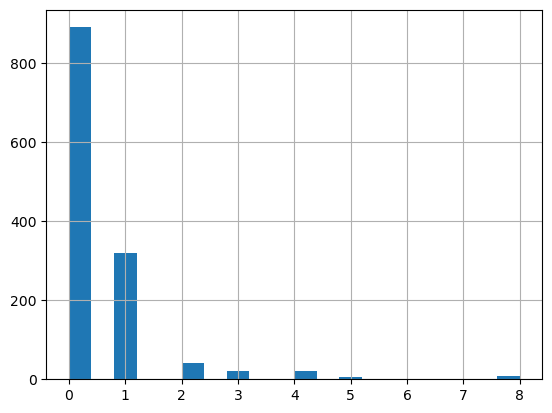

In [12]:
# 1 To understand whether a variable is continuous or discrete, we can also make a histogram:
# Let's make a histogram for the sibsp variable by dividing the variable value range into 20 intervals:
data['sibsp'].hist(bins=20)

<AxesSubplot:>

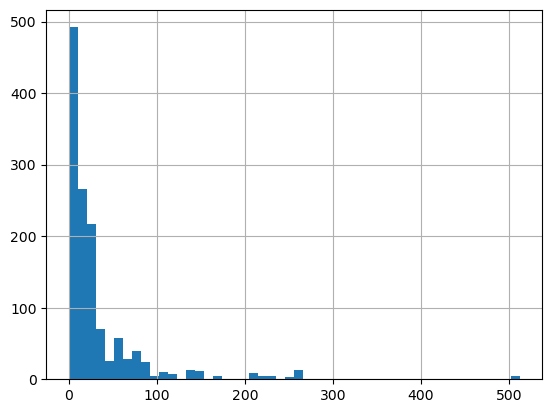

In [13]:
# 2 Now, let's make a histogram of the fare variable by sorting the values into 50 contiguous intervals:
data['fare'].hist(bins=50)

## **Quantifying missing data**

Missing data refers to **the absence of a value for observations and is a common occurrence in most datasets**. `Scikit-learn`, the open source Python library for machine learning, **does not support missing values as input for machine learning models**, so **we need to convert these values into numbers**. To select the missing data imputation technique, it is important to know about the amount of missing information in our variables.

### **Getting ready**

We will use the `KDD-CUP-98` dataset from UCI Machine Learning repository.

### **How to do it**

In [14]:
# 1 Import the libs
import pandas as pd
import matplotlib.pyplot as plt

# Load a few variables from the dataset into a pandas dataframe and inspect the
# 1st 5 rows
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
data = pd.read_csv('../data/cup98LRN.txt', usecols=cols)
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [15]:
# 3 Let's calculate the number of missing values in each variable
data.isnull().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [16]:
# 4 Let's quanditfy the percentage of missing values in each variable
data.isnull().mean()

AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

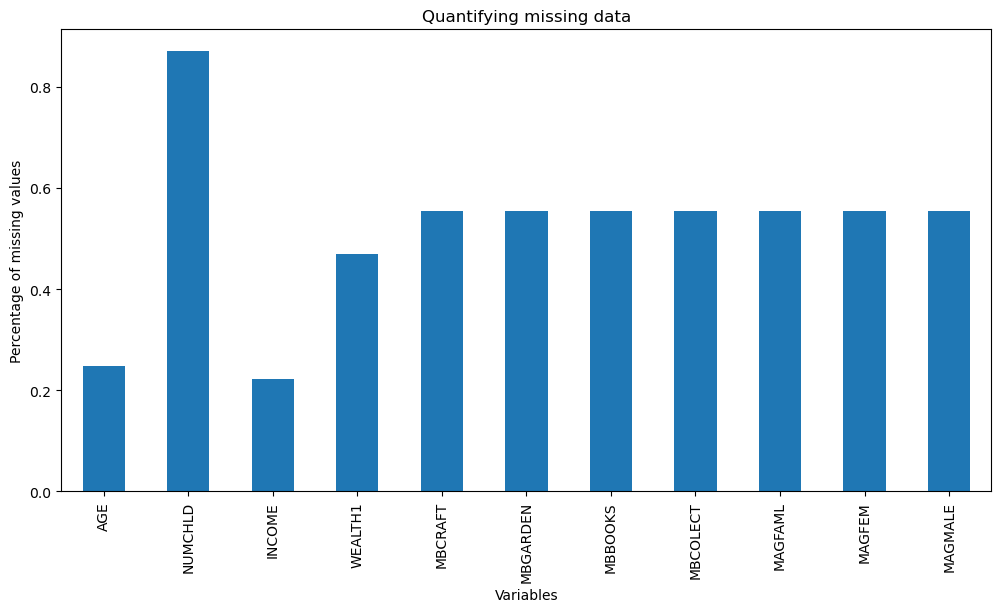

In [17]:
# 5 Finally, let's make a bar plot with the percentage of missing values per variable:
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

## **Determining cardinality in categorical variables**

**The number of unique categories in a variable is called cardinality**. For example, the cardinality of the `Gender` variable, which takes values of `female` and `male`, is $2$, whereas the cardinality of the `Civil` status variable, which takes values of `married`, `divorced`, `singled`, and `widowed`, is $4$.

### **Getting ready**

We will continue with the same dataset

### **How to do it**

In [18]:
# 1 Import the required Python libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 2 Let's load a few categorical variables from the dataset:
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
data = pd.read_csv('../data/cup98LRN.txt', usecols=cols)
# 3 Let's replace the empty strings with NaN values and inspect
# the first five rows of the data:
data = data.replace(' ', np.nan)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [19]:
# 4 Now, let's determine the number of unique categories in each variable:
data.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

> The `nunique()` method **ignores missing values by default**. **If we want to consider missing values as an additional category, we should set the dropna argument to False**: `data.nunique(dropna=False)`.

In [20]:
# 5 Now, let's print out the unique categories of the GENDER variable:
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

> pandas `nunique()` **can be used in the entire dataframe**. pandas `unique()`, on the other hand, **works only on a pandas Series**. Thus, **we need to specify the column name** that we want to return the unique values for.

Text(0.5, 1.0, 'Cardinality')

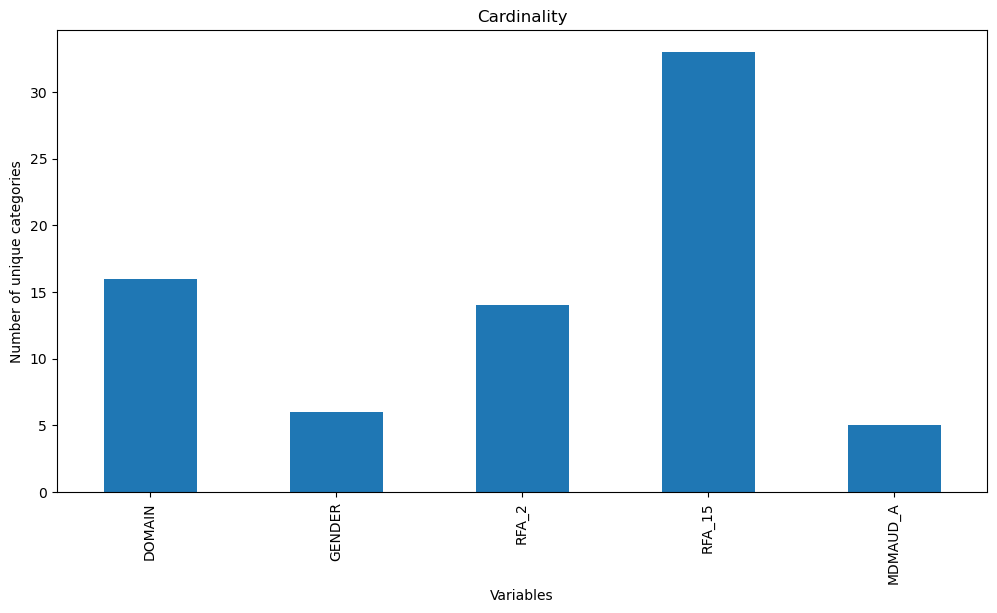

In [21]:
# 6 Let's make a plot with the cardinality of each variable:
data.nunique().plot.bar(figsize=(12, 6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### **There's more**

The `nunique()` method determines the number of unique values for categorical and numerical variables. In this recipe, we only used `nunique()` on categorical variables to explore the concept of cardinality. However, we could also use `nunique()` to evaluate numerical variables.

We can also evaluate the cardinality of a subset of the variables in a dataset by slicing the dataframe:

In [22]:
data[['RFA_2', 'MDMAUD_A', 'RFA_2']].nunique()

RFA_2       14
MDMAUD_A     5
RFA_2       14
dtype: int64

## **Pinpointing rare categories in categorical variables**

Different labels appear in a variable with different frequencies. Some categories of a variable appear a lot, that is, they are very common among the observations, whereas other categories appear only in a few observations. In fact, categorical variables often contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only seldom. Categories that appear in a tiny proportion of the observations are rare. Typically, **we consider a label to be rare when it appears in less than $5\%$ or $1\%$ of the population**.

### **Getting ready**

We will use the Car Evaluation dataset

### **How to do it**

In [24]:
# 1 Import the libs
import pandas as pd
import matplotlib.pyplot as plt
# 2 Let's load the Car Evaluation dataset, add the column names
# and display the first 5 rows
data = pd.read_csv('../data/car.data', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


> By default, pandas `read_csv()` uses the first row of the data as the column names. If the column names are not part of the raw data, we need to specifically tell pandas not to assign the column names by adding the` header=None` argument.

In [25]:
# 3 Let's display the unique categories of the variable class:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [26]:
# 4 Let's calculate the number of cars per category of the class variable
# and then divide them by the total number of cars in the dataset to obtain
# the percentage of cars per category. Then, we'll print the result:
label_freq = data['class'].value_counts() / len(data)
print(label_freq)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


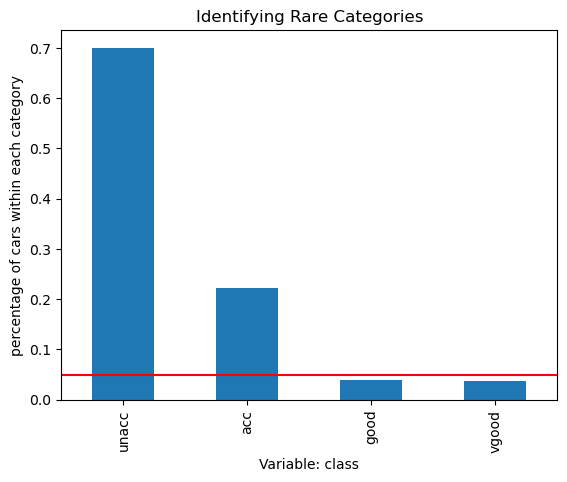

In [27]:
# 5 Let's make a bar plot showing the frequency of each category and highlight the 5% mark with a red line:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

The `good` and `vgood` categories are present in less than $5\%$ of cars, as indicated by the red line in the preceding plot.

## **Identifying a linear relationship**

Linear models assume that the independent variables, `X`, take a linear relationship with the dependent variable, `Y`. This relationship can be dictated by the following equation:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Here, `X` specifies the independent variables and $\beta$ are the coefficients that indicate a unit change in `Y` per unit change in `X`. Failure to meet this assumption may result in poor model performance.

Linear relationships can be evaluated by scatter plots and residual plots. Scatter plots output the relationship of the independent variable X and the target `Y`. Residuals are the difference between the linear estimation of `Y` using `X` and the real target:

$$
error = target - predictions
$$

If the relationship is linear, the residuals should follow a normal distribution centered at zero, while the values should vary homogeneously along the values of the independent variable. In this recipe, we will evaluate the linear relationship using both scatter and residual plots in a toy dataset.


### **How to do it**

In [32]:
# 1 Import the required Python libraries and a linear regression class:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# 2 Create an x variable with 200 observations that are normally distributed:
np.random.seed(29)
x = np.random.randn(200)

> Setting the seed for reproducibility using `np.random.seed()` will help you get the outputs shown in this recipe.

Text(0.5, 28.999999999999986, 'Independent variable')

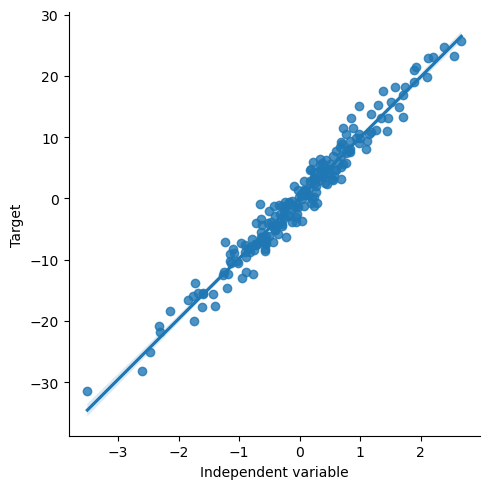

In [34]:
# 3 Create a y variable that is linearly related to x with some added random noise:
y = x * 10 + np.random.randn(200) * 2
# 4 Create a dataframe with the x and y variables:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
# 5 Plot a scatter plot to visualize the linear relationship:
sns.lmplot(x="x", y="y", data=data, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

In [36]:
# 6 Build a linear regression model between x and y:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

> Scikit-learn predictor classes do not take pandas Series as arguments. Because `data['x']` is a pandas Series, we need to convert it into a dataframe using `to_frame()`.

Now, we need to calculate the residuals.

Text(0.5, 9.444444444444438, 'Residuals')

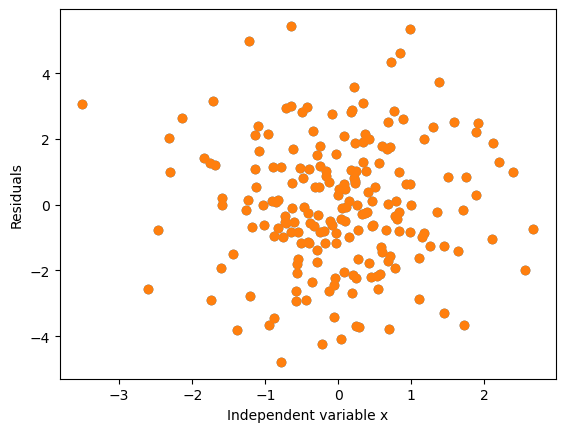

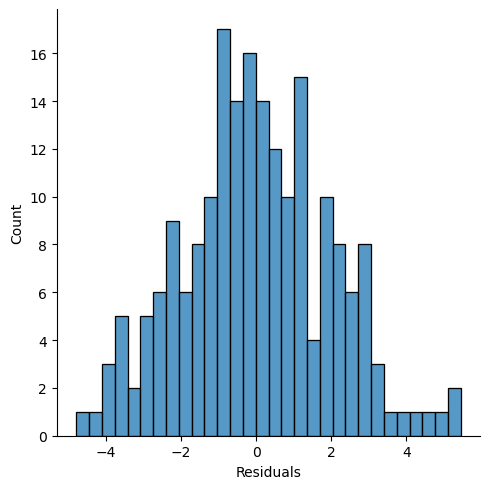

In [40]:
# 7 Make predictions of y using the fitted linear model:
predictions = linreg.predict(data['x'].to_frame())
# 8 Calculate the residuals, that is the difference between the predictions
# and the real outcome, y
residuals = data['y'] - predictions
# 9 Make a scatter plot of the independent variable x and the residuals:
plt.scatter(y=residuals, x=data['x'])
plt.scatter(y=residuals, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')
# 10 Finally, let's evaluate the distribution of the residuals:
sns.displot(residuals, bins=30)
plt.xlabel('Residuals')

## **Identifying a normal distribution**

Linear models assume that the independent variables are normally distributed. Failure to meet this assumption may produce algorithms that perform poorly. We can determine whether a variable is normally distributed with histograms and `Q-Q` plots. In a `Q-Q` plot, the quantiles of the independent variable are plotted against the expected quantiles of the normal distribution. If the variable is normally distributed, the dots in the `Q-Q` plot should fall along a 45 degree diagonal. In this recipe, we will learn how to evaluate normal distributions using histograms and `Q-Q` plots.

### **How to do it**

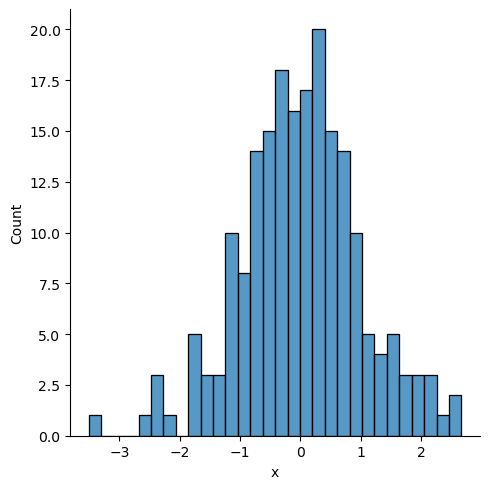

In [44]:
# 1 Import the required python libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
# 2 Create a variable, x, with 200 observations that are normally distributed
np.random.seed(29)
x = np.random.randn(200)
# 3 Create a dataframe with the x variable
data = pd.DataFrame([x]).T
data.columns = ['x']
# 4 Make a histogram and a density plot of the variable distribution
sns.displot(data['x'], bins=30)


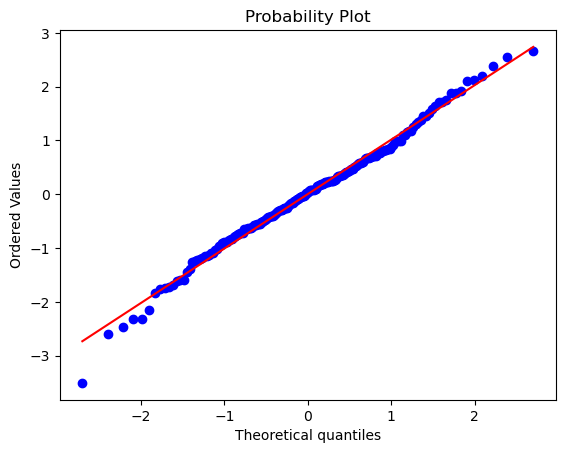

In [45]:
# 4 Create and display a Q-Q plot to assess a normal distribution
stats.probplot(data['x'], dist='norm', plot=plt)
plt.show()

Since the variable is normally distributed, its values follow the theoretical quantiles and thus lie along the 45-degree diagonal.

## **Distinguishing variable distribution**

**A probability distribution is a function that describes the likelihood of obtaining the possible values of a variable**. There are many well-described variable distributions, such as the normal, binomial, or Poisson distributions. Some machine learning algorithms assume that the independent variables are normally distributed. Other models make no assumptions about the distribution of the variables, but a better spread of these values may improve their performance. In this recipe, we will learn how to create plots to distinguish the variable distributions in the entire dataset by using the Boston House Prices dataset from scikit-learn.

### **Getting ready**

We will learn how to visualize the distributions of the variables in a dataset using histograms.

### **How to do it**

c:\Users\HP\miniconda3\envs\sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

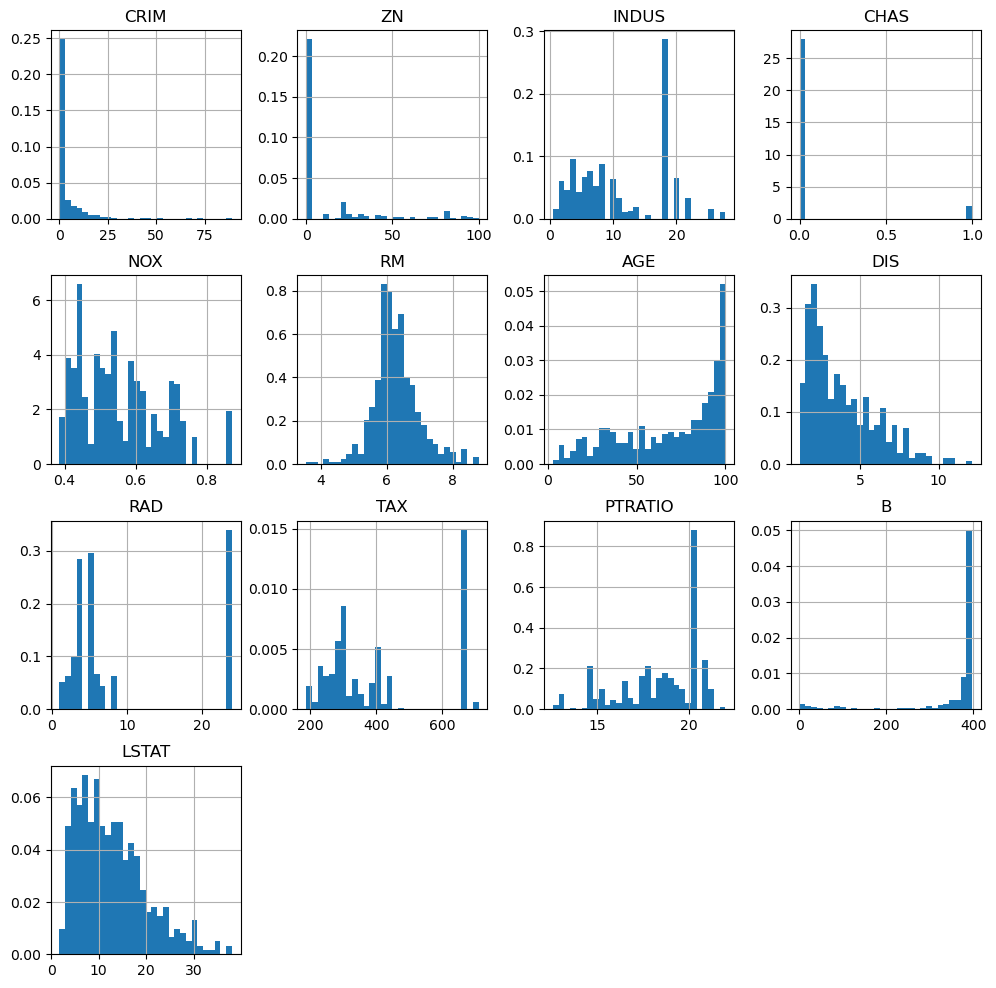

In [48]:
# 1 Import the required Python libraries and modules:
import pandas as pd
import matplotlib.pyplot as plt
# 2 Load the Boston House Prices dataset from scikit-learn:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# 3 Visualize the variable distribution with histograms: 
boston.hist(bins=30, figsize=(12, 12), density=True)
plt.show()

### **Highlighting outliers**

An outlier is a data point that is significantly different from the remaining data. On occasions, outliers are very informative; for example, when looking for credit card transactions, an outlier may be an indication of fraud. In other cases, outliers are rare observations that do not add any additional information. These cases may also affect the performance of some machine learning models.

> "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall, 1980.]

### **Getting ready**

e will learn how to identify outliers using boxplots and the inter-quartile range (IQR) proximity rule. According to the IQR proximity rule, a value is an outlier if it falls outside these boundaries:

$$
Upper~boundary = 75th~quantile + (IQR * 1.5)
$$

$$
Lower`boundary = 25th~quantile - (IQR * 1.5)
$$

Here, IQR is given by the following equation:

$$
IQR = 75th quantile - 25th quantile
$$

> Typically, we calculate the IQR proximity rule boundaries by multiplying the IQR by 1.5. However, it is also common practice to find extreme values by multiplying the IQR by 3.

### **How to do it**

c:\Users\HP\miniconda3\envs\sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

Text(0.5, 1.0, 'Boxplot')

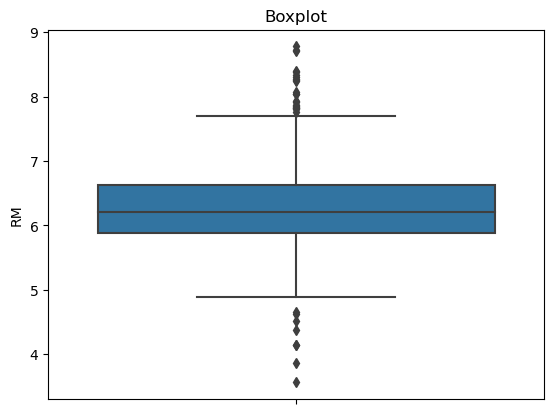

In [52]:
# 1 Import the required Python libraries and the dataset:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
# 2 Load the Boston House Prices dataset from scikit-learn and retain three of its variables in a dataframe:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,\
    columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]
# 3 Make a boxplot for the RM variable: 
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

We can change the final size of the plot using the `figure()` method from `Matplotlib`. We need to call this command before making the plot with seaborn:
```py
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')
```

To find the outliers in a variable, **we need to find the distribution boundaries according to the IQR proximity rule**, which we discussed in the Getting ready section of this recipe.

In [53]:
# 4 Create a function that takes a dataframe, a variable name
# and the factor to use in the IQR calculation and returns the
# IQR proximity rule boundaries:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

# 5 Calculate and then display the IQR proximity rule boundaries for the RM variable
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

The `find_boundaries()` function returns the values above and below which we can consider a value to be an outlier

> If you want to find very extreme values, you can use 3 as the distance of find_boundaries() instead of 1.5.

Now, we need to find the outliers in the dataframe.

In [54]:
# 6 Create a boolean vector to flag observation outside the boundaries we determined in step 5
outliers = np.where(boston['RM'] > upper_boundary, True, np.where(boston['RM'] < lower_boundary, True, False))
# 7 Create a new dataframe with the outlier values and then display the top five rows
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [55]:
# To remove the outliers from the dataset, execute
boston.loc[~outliers, 'RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64

## **Comparing feature magnitude**

Many machine learning algorithms are **sensitive to the scale of the features**. For example, **the coefficients of linear models are directly informed by the scale of the feature**. In addition, **features with bigger value ranges tend to dominate over features with smaller ranges**. Having features **within a similar scale also helps algorithms converge faster, thus improving performance and training times**.

### **Getting ready**

You need to be **familiar with common statistical parameters** such as **mean**, **quantiles**, **maximum** and **minimum** values, and **standard deviation**. We will use the Boston House Prices dataset included in scikit-learn to do this.

### **How to do it**

In [56]:
# 1 Import the libraries
import pandas as pd
from sklearn.datasets import load_boston
# 2 Load the boston house prices dataset from scikit-learn into a dataframe
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# 3 Print the main statistics for each variable in the dataset, that is, the mean,
# count, standard deviation, median, quantiles, and minimum and maximum values:
data.describe()

c:\Users\HP\miniconda3\envs\sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [57]:
# 4 Calculate the value range of each variable, that is, the difference between the maximum and minimum value:
data.max() - data.min()

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64